In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from realnvp_3d import *
import celeba
import torch
import os
import matplotlib.pyplot as plt
import numpy as np
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import time
import random
import torch.nn as nn

In [3]:
ngpu = 1
device = torch.device("cuda:2" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [4]:
dataset = celeba.make_dataset("./data/")
test_size =  len(dataset) // 6
train, test = torch.utils.data.random_split(dataset, (len(dataset) - test_size, test_size))
train_loader = DataLoader(train, batch_size=64, num_workers=4)
test_loader = DataLoader(test, batch_size=64, num_workers=4)

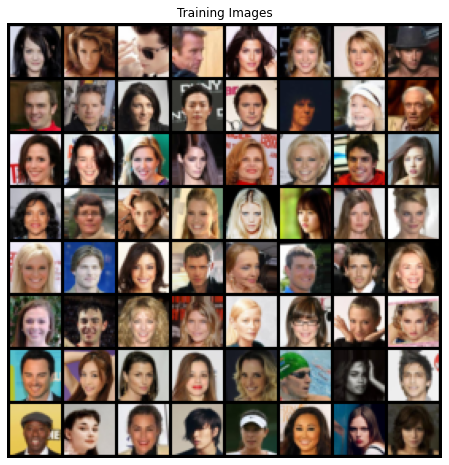

In [5]:
# Plot some training images
real_batch = next(iter(train_loader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))